Google stock price prediction - RNN

In [2]:
# Import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df  = pd.read_csv(r'trainset.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [4]:
trainset = df.iloc[:, 1 : 2].values

In [5]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_scaled = sc.fit_transform(trainset)

In [8]:
train_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [9]:
x_train = []
y_train = []

In [10]:
for i in range(60,1259):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [11]:
x_train.shape

(1199, 60)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [15]:
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(Dense(units = 1))

In [20]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [21]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 79ms/step - loss: 0.0285
Epoch 2/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0044
Epoch 3/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0043
Epoch 4/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0038
Epoch 5/100
38/38 [==============================] - 14s 385ms/step - loss: 0.0040
Epoch 6/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0035
Epoch 7/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0037
Epoch 8/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0034
Epoch 9/100
38/38 [==============================] - 23s 624ms/step - loss: 0.0033
Epoch 10/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0030
Epoch 11/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0031
Epoch 12/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0030
Epoch 13/10

In [22]:
df1 = pd.read_csv(r'testset.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
...,...,...,...,...,...,...,...
120,2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
121,2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
122,2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900
123,2018-06-28,1102.089966,1122.310059,1096.010010,1114.219971,1114.219971,1072400


In [34]:
real_stock_price = df1.iloc[:,1:2].values

In [35]:
dataset_total = pd.concat((df1['Open'], df1['Open']),axis = 0)
dataset_total

0      1048.339966
1      1064.310059
2      1088.000000
3      1094.000000
4      1102.229980
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 250, dtype: float64

In [36]:
inputs = dataset_total[len(dataset_total) - len(df1)-60:].values
inputs

array([1020.      , 1016.799988, 1026.439941, 1027.98999 , 1025.040039,
       1040.880005, 1037.      , 1051.369995, 1077.430054, 1069.400024,
       1082.      , 1077.859985, 1052.      , 1025.52002 , 1029.51001 ,
       1046.      , 1030.01001 , 1013.659973, 1028.099976, 1019.      ,
       1016.900024, 1049.22998 , 1058.540039, 1058.099976, 1086.030029,
       1093.599976, 1100.      , 1090.      , 1077.310059, 1079.890015,
       1061.859985, 1074.060059, 1083.560059, 1065.130005, 1079.      ,
       1079.02002 , 1064.890015, 1063.030029, 1067.560059, 1099.349976,
       1122.329956, 1140.98999 , 1142.170044, 1131.319946, 1118.180054,
       1118.599976, 1131.069946, 1141.119995, 1143.849976, 1148.859985,
       1143.650024, 1158.5     , 1175.310059, 1174.849976, 1159.140015,
       1143.599976, 1128.      , 1121.339966, 1102.089966, 1120.      ,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [37]:
inputs = inputs.reshape(-1,1)
inputs

array([[1020.      ],
       [1016.799988],
       [1026.439941],
       [1027.98999 ],
       [1025.040039],
       [1040.880005],
       [1037.      ],
       [1051.369995],
       [1077.430054],
       [1069.400024],
       [1082.      ],
       [1077.859985],
       [1052.      ],
       [1025.52002 ],
       [1029.51001 ],
       [1046.      ],
       [1030.01001 ],
       [1013.659973],
       [1028.099976],
       [1019.      ],
       [1016.900024],
       [1049.22998 ],
       [1058.540039],
       [1058.099976],
       [1086.030029],
       [1093.599976],
       [1100.      ],
       [1090.      ],
       [1077.310059],
       [1079.890015],
       [1061.859985],
       [1074.060059],
       [1083.560059],
       [1065.130005],
       [1079.      ],
       [1079.02002 ],
       [1064.890015],
       [1063.030029],
       [1067.560059],
       [1099.349976],
       [1122.329956],
       [1140.98999 ],
       [1142.170044],
       [1131.319946],
       [1118.180054],
       [11

In [38]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [39]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [40]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [41]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [42]:
predicted_price = regressor.predict(x_test)

4/4 [==============================] - 0s 27ms/step


In [43]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1129.8444],
       [1119.838 ],
       [1108.3569],
       [1102.3385],
       [1103.5991],
       [1110.0116],
       [1117.9724],
       [1122.1583],
       [1122.7916],
       [1120.7311],
       [1121.7552],
       [1125.2006],
       [1129.648 ],
       [1133.4098],
       [1136.4116],
       [1141.6005],
       [1150.4525],
       [1159.4006],
       [1165.9921],
       [1169.6897],
       [1170.0051],
       [1168.889 ],
       [1166.9851],
       [1159.9739],
       [1146.1755],
       [1122.574 ],
       [1103.6234],
       [1092.5498],
       [1083.6101],
       [1079.1711],
       [1078.4569],
       [1079.803 ],
       [1085.112 ],
       [1093.1505],
       [1100.5378],
       [1106.842 ],
       [1112.3187],
       [1115.7064],
       [1118.8818],
       [1123.8577],
       [1127.0896],
       [1125.681 ],
       [1113.9863],
       [1099.965 ],
       [1093.423 ],
       [1094.4119],
       [1102.8568],
       [1116.6934],
       [1133.9863],
       [1149.921 ],


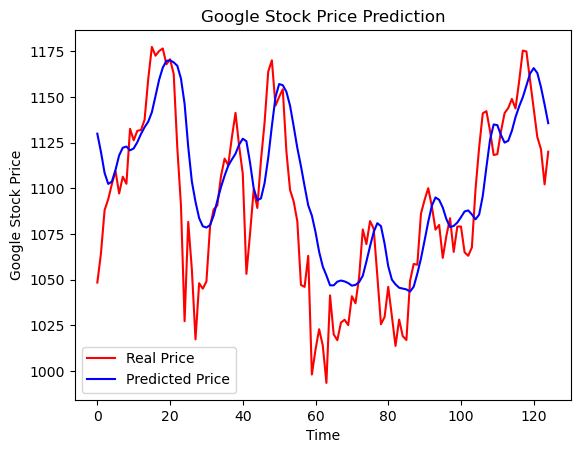

In [44]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()